-25.752463881318658


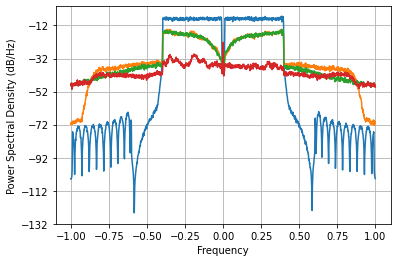

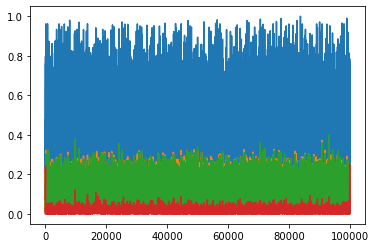

In [150]:
import numpy as np
import matplotlib.pyplot as plt

x = np.load('lte_2c_data1_in.npy')
y = np.load('lte_2c_data1_out.npy')
coeff = max(abs(x[0:100000]))

x = x[0:100000] / coeff
y = y[0:100000] / coeff

d = y - x


ORD = 7

dl = [-4, -3, -2, -1, 0, 1, 2, 3, 4]
ds = [-4, -10, -5, -3, -1, 0, 2, 10, 4]


mem = len(dl)

U = np.zeros((len(d), mem*(ORD+1)), dtype = complex)


ind = np.arange(30,len(d)-30)
for k in ind:
    for m in range(mem):
        for p in range(ORD+1):
            U[k, p+m*(ORD+1) ] = x[k - dl[m]] * abs(x[k - ds[m]])**(2*p)
        
        
# LS estimation
     
Rxx = np.matmul(np.conj(U.T), U)
rdy = np.matmul(np.conj(U.T), d)

w = np.matmul(np.linalg.pinv(Rxx),rdy)

z = np.matmul(U, w)
e = d-z

accuracy = 10*np.log10(np.abs(np.matmul(np.conj(e.T), e)/np.matmul(np.conj(x.T), x)))
print(accuracy)

plt.figure(1)
plt.psd(x, NFFT = 2048)
plt.psd(d, NFFT = 2048)
plt.psd(z, NFFT = 2048)
plt.psd(e, NFFT = 2048)
plt.grid(True)
plt.show()

plt.figure(2)
plt.plot(abs(x))
plt.plot(abs(d))
plt.plot(abs(z))
plt.plot(abs(e))

